<table>
    <tr style="background-color: transparent;  text-align:center;">
        <td><font size="7" color="FF3434">Computación cuántica</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td><font size="6" color="black">Proyecto: Optimización de rutas para
una empresa de entregas </font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td><font size="5" color="black">Facultad de Ingeniería, UNAM</font></td>
    </tr>
    <tr style="background-color: transparent; text-align:center;">
        <td><font size="4" color="black">Semestre 2024-2</font></td>
    </tr>
   
</table>

# 1. Marco teórico

## 1.1 Problema del vendedor ambulante

### 1.1.1 Descripción del problmea

El problema del vendedor ambulante o también llamado problema del agente viajero consiste en, dada una distribución de N ciudades, encontrar el camino más corto con el cual se visitan todas las ciudades, con las restricciones de solo poder pasar una vez por cada ciudad y de empezar y acabar el tour en la misma ciudad.

Este problema pertenece al tipo de problemas NP-hard, por lo que actualmente no es posible encontrar la solución exacta en un tiempo polinómico.

## 1.2 Algoritmo de Grover

# Definición de Grafo

El grafo de las ciudades que utilizaremos es el siguiente:

<img src="https://raw.githubusercontent.com/Andrea585976/Proyecto_Computacion_Cuantica/main/ciudades.png" width="400" height="300">

En donde hemos marcado la ruta óptima. 

In [16]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx

In [34]:
def graph_viz(G):
    """Visualizar un grafo NetworkX

    Parámetros
    ----------
    G : networkx.Graph
        El grafo de NetworkX que se visualizará.

    nx.draw_kamada_kawai(
        G,
        with_labels=True,
        node_size=600,
        width=2,
        font_size=10,
        font_weight="bold",
        font_color="whitesmoke",
    )
    """
    options = {
        "node_size": 600,
        "width": 3,
        "arrowstyle": "--|>",
        "arrowsize": 40,
        "font_size": 20,
        "font_weight": "bold",
        "font_color": "whitesmoke",
    }
    pos = nx.kamada_kawai_layout(G)  # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G, pos, **options)
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.axis("off")
    plt.show()


def maxcut_viz(G, cut_nodes):
    """Visualizar el resultado del problema MaxCut.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.
    cut_nodes : dict

    """
    if isinstance(cut_nodes, dict):
        cut = set()
        for node, value in cut_nodes.items():
            if value == 1:
                cut.add(node)
    else:
        cut = cut_nodes

    S0 = [node for node in G.nodes if node in cut]
    S1 = [node for node in G.nodes if node not in cut]

    cut_edges = [
        (u, v)
        for u, v in G.edges
        if (u in S0 and v not in S0) or (u in S1 and v not in S1)
    ]
    uncut_edges = [
        (u, v) for u, v in G.edges if (u in S0 and v in S0) or (u in S1 and v in S1)
    ]

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, nodelist=S0, node_color="tab:red", node_size=700)
    nx.draw_networkx_nodes(G, pos, nodelist=S1, node_color="tab:green", node_size=700)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=cut_edges,
        style="dashed",
        edge_color="tab:blue",
        alpha=0.7,
        width=3,
    )
    nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style="solid", width=3)
    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )

    plt.tight_layout()
    plt.axis("off")
    plt.show()


def graph_coloring_viz(G, coloring):
    """Visualizar la salida del problema del graph coloring.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.

    coloring : dict
        Los colores asignado a los nodos.
    """

    color_list = {
        "B": "tab:blue",
        "O": "tab:orange",
        "G": "tab:green",
        "R": "tab:red",
        "P": "tab:pink",
        "Y": "tab:olive",
    }

    colors = list(mcolors.TABLEAU_COLORS)

    pos = nx.kamada_kawai_layout(G)

    for node, color in coloring.items():
        if isinstance(color, int):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color=[colors[color]], node_size=700
            )
        elif isinstance(color, str):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color=[color_list[color]], node_size=700
            )
        elif isinstance(color, list):
            nx.draw_networkx_nodes(
                G, pos, nodelist=[node], node_color="tab:black", node_size=700
            )

    nx.draw_networkx_edges(G, pos, edgelist=G.edges, style="solid", width=3)
    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )
    plt.tight_layout()
    plt.axis("off")
    plt.show()


def tsp_viz(G, input_path):
    """Visualizar la salida del travelling salesman problem.

    Parámetros
    ----------
    G : networkx.Graph
        Grafo NetworkX del problema.

    input_path : list/dict
        El orden en que se visitan las ciudades.
    """
    if isinstance(input_path, dict):
        input_path = [city for (pos, [city]) in sorted(input_path.items())]

    path = []
    for i in range(len(input_path)):
        if i + 1 == len(input_path):
            path.append((input_path[i], input_path[0]))
        else:
            path.append((input_path[i], input_path[i + 1]))

    non_path = [(u, v) for u, v in G.edges if (u, v) not in path and (v, u) not in path]

    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(
        G, pos, nodelist=G.nodes, node_color="tab:blue", node_size=700
    )

    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=path,
        style="solid",
        width=3,
        arrows=True,
        arrowstyle="->",
        arrowsize=30,
    )
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=non_path,
        style="dashed",
        edge_color="tab:blue",
        alpha=0.7,
        width=3,
    )

    nx.draw_networkx_labels(
        G, pos, font_size=14, font_weight="bold", font_color="whitesmoke"
    )
    labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.tight_layout()
    plt.axis("off")
    plt.show()

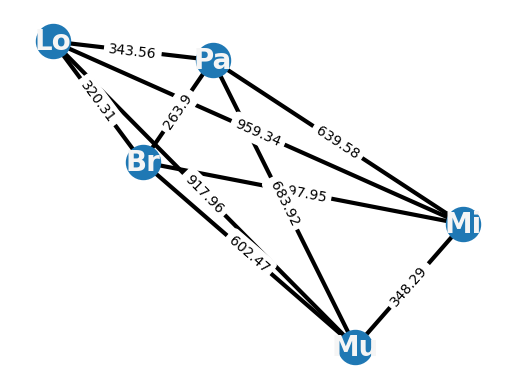

In [35]:
G = nx.Graph()
G.add_weighted_edges_from(
    [('Mi', 'Pa', 639.58), ('Mi', 'Lo', 959.34), ('Mi', 'Br', 697.95), ('Mi', 'Mu', 348.29), ('Pa', 'Lo', 343.56), ('Pa', 'Br', 263.9), ('Pa', 'Mu', 683.92), ('Lo', 'Br', 320.31), ('Lo', 'Mu', 917.96), ('Br', 'Mu', 602.47)]
)
graph_viz(G)
#path = ['Mi', 'Pa', 'Lo', 'Br', 'Mu']
#tsp_viz(G, path)

# 2. Solución clásica

In [71]:
import itertools
import numpy as np

# Matriz de distancias
distances = np.array([[0, 639.58, 959.34, 697.95, 348.29],
                      [639.58, 0, 343.56, 263.90, 683.92],
                      [959.34, 343.56, 0, 320.31, 917.96],
                      [697.95, 263.90, 320.31, 0, 602.47],
                      [348.29, 683.92, 917.96, 602.47, 0]])

# Definir ciudades
cities = [0, 1, 2 ,3, 4]

# Generar todas las permutaciones de rutas posibles
routes = list(itertools.permutations(cities))

# Mapeo de índice a permutación
index_to_route = {i: route for i, route in enumerate(routes)}

# Mostrar el mapeo de índices a rutas y su representación binaria
for i in range(len(routes)):
    print(f"Índice {i}: Ruta {routes[i]} -> Binario: {format(i, '04b')}")

# Función para calcular la distancia de una ruta
def calculate_route_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]  # Regresar a la ciudad de origen
    return total_distance

# Encontrar la ruta óptima
optimal_route = min(routes, key=calculate_route_distance)
optimal_route_index = routes.index(optimal_route)

print("\nRuta óptima:", optimal_route)
print("Índice de la ruta óptima:", optimal_route_index)
print("Representación binaria de la ruta óptima:", format(optimal_route_index, '04b'))


Índice 0: Ruta (0, 1, 2, 3, 4) -> Binario: 0000
Índice 1: Ruta (0, 1, 2, 4, 3) -> Binario: 0001
Índice 2: Ruta (0, 1, 3, 2, 4) -> Binario: 0010
Índice 3: Ruta (0, 1, 3, 4, 2) -> Binario: 0011
Índice 4: Ruta (0, 1, 4, 2, 3) -> Binario: 0100
Índice 5: Ruta (0, 1, 4, 3, 2) -> Binario: 0101
Índice 6: Ruta (0, 2, 1, 3, 4) -> Binario: 0110
Índice 7: Ruta (0, 2, 1, 4, 3) -> Binario: 0111
Índice 8: Ruta (0, 2, 3, 1, 4) -> Binario: 1000
Índice 9: Ruta (0, 2, 3, 4, 1) -> Binario: 1001
Índice 10: Ruta (0, 2, 4, 1, 3) -> Binario: 1010
Índice 11: Ruta (0, 2, 4, 3, 1) -> Binario: 1011
Índice 12: Ruta (0, 3, 1, 2, 4) -> Binario: 1100
Índice 13: Ruta (0, 3, 1, 4, 2) -> Binario: 1101
Índice 14: Ruta (0, 3, 2, 1, 4) -> Binario: 1110
Índice 15: Ruta (0, 3, 2, 4, 1) -> Binario: 1111
Índice 16: Ruta (0, 3, 4, 1, 2) -> Binario: 10000
Índice 17: Ruta (0, 3, 4, 2, 1) -> Binario: 10001
Índice 18: Ruta (0, 4, 1, 2, 3) -> Binario: 10010
Índice 19: Ruta (0, 4, 1, 3, 2) -> Binario: 10011
Índice 20: Ruta (0, 4, 2, 

# 3. Solución cuántica

El elemento 00000 es observado con probabilidad 0.9991823155432752
El elemento 00001 es observado con probabilidad 2.63769179583e-05
El elemento 00010 es observado con probabilidad 2.63769179583e-05
El elemento 00011 es observado con probabilidad 2.63769179583e-05
El elemento 00100 es observado con probabilidad 2.63769179583e-05
El elemento 00101 es observado con probabilidad 2.63769179583e-05
El elemento 00110 es observado con probabilidad 2.63769179583e-05
El elemento 00111 es observado con probabilidad 2.63769179583e-05
El elemento 01000 es observado con probabilidad 2.63769179583e-05
El elemento 01001 es observado con probabilidad 2.63769179583e-05
El elemento 01010 es observado con probabilidad 2.63769179583e-05
El elemento 01011 es observado con probabilidad 2.63769179583e-05
El elemento 01100 es observado con probabilidad 2.63769179583e-05
El elemento 01101 es observado con probabilidad 2.63769179583e-05
El elemento 01110 es observado con probabilidad 2.63769179583e-05
El elemen

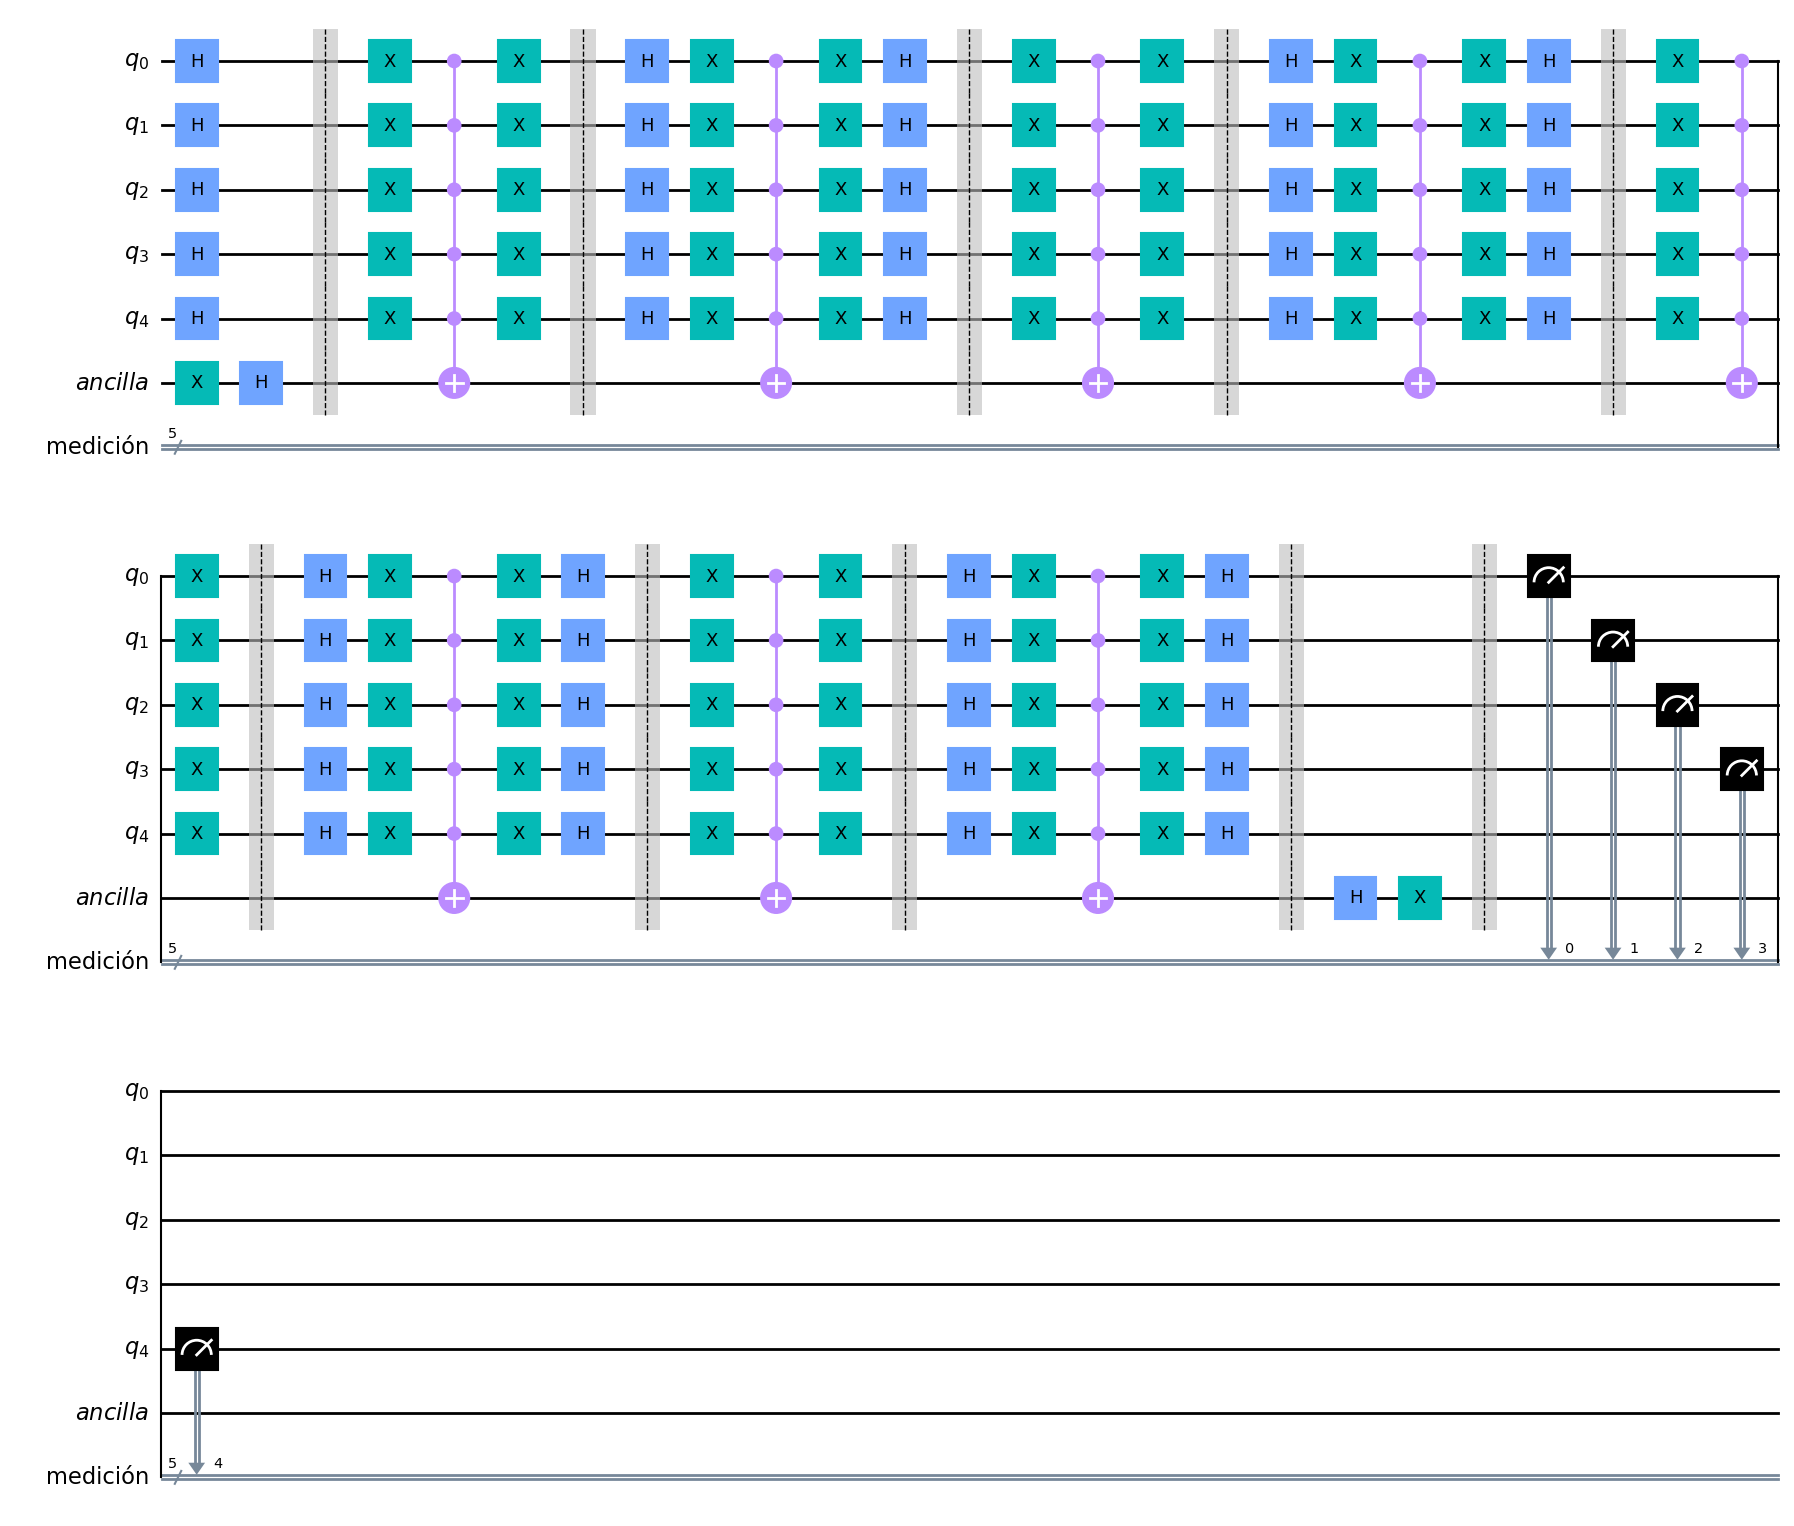

In [68]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, transpile
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import numpy as np
import itertools

# Nueva matriz de distancias entre las ciudades (Milán, París, Londres, Bruselas, Múnich)
distances = np.array([[0, 639.58, 959.34, 697.95, 348.29],
                      [639.58, 0, 343.56, 263.90, 683.92],
                      [959.34, 343.56, 0, 320.31, 917.96],
                      [697.95, 263.90, 320.31, 0, 602.47],
                      [348.29, 683.92, 917.96, 602.47, 0]])

# Definimos la función para calcular la distancia de una ruta
def calculate_route_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    total_distance += distances[route[-1]][route[0]]  # Regresar a la ciudad de origen
    return total_distance

# Generamos todas las permutaciones de rutas posibles
cities = [0, 1, 2, 3, 4]
routes = list(itertools.permutations(cities))

# Encontramos la ruta óptima (con menor distancia)
optimal_route = min(routes, key=calculate_route_distance)
optimal_route_index = routes.index(optimal_route)
optimal_route_binary = format(optimal_route_index, '05b')


# Definimos nuestro oráculo Uf para marcar la ruta óptima
def Uf_tsp(circuit, qreg, ancilla):
    # Convertir el índice de la ruta óptima a binario y aplicarlo como control
    for i, bit in enumerate(optimal_route_binary):
        if bit == '0':
            circuit.x(qreg[i])
    circuit.mcx(qreg, ancilla)
    for i, bit in enumerate(optimal_route_binary):
        if bit == '0':
            circuit.x(qreg[i])

# Definimos la función de inversión
def inversion(circuit, quantum_reg, ancilla):
    circuit.h(quantum_reg)
    circuit.x(quantum_reg)
    circuit.mcx(quantum_reg, ancilla)
    circuit.x(quantum_reg)
    circuit.h(quantum_reg)

# Implementamos el algoritmo de Grover visto en clase
def grover(U_f, n=5, iterations=4):
    qreg = QuantumRegister(n, 'q')
    ancilla = QuantumRegister(1, 'ancilla')
    creg = ClassicalRegister(n, 'medición')

    grover_circuit = QuantumCircuit(qreg, ancilla, creg)

    # Paso inicial - igual superposición
    grover_circuit.h(qreg)

    # Iniciar ancilla
    grover_circuit.x(ancilla)
    grover_circuit.h(ancilla)
    grover_circuit.barrier()

    # Iteraciones de Grover
    for _ in range(iterations):
        # Consulta (query)
        U_f(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()

        # Inversión
        inversion(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()

    # Regresar el ancilla
    grover_circuit.h(ancilla)
    grover_circuit.x(ancilla)
    grover_circuit.barrier()

    # Medición
    grover_circuit.measure(qreg, creg)

    # Ejecutar el circuito
    sampler = Sampler()
    job = sampler.run(grover_circuit)

    probs = job.result().quasi_dists[0].binary_probabilities()

    # Imprimir el resultado
    for outcome in probs:
        print("El elemento", outcome, "es observado con probabilidad", probs[outcome])

    display(grover_circuit.draw(output='mpl'))

# Ejecutar el algoritmo de Grover para el oráculo definido
grover(Uf_tsp)


**Rutas y distancias**

Para las rutas y distancias primero se generan todas las permutaciones posibles de las rutas entre las ciudades.
Posteriormente calculamos la distancia total para cada ruta, para así identificar la ruta con la distancia mínima y su índice.


Posteriormente definimos nuestro oráculo, el cual se encarga marcar la ruta óptima basada en su índice binario.

**Grover**

Por último, tenemos la aplicación del algortimo de Grover, este hace lo siguiente en nuestra solución:

-Inicializa los qubits en una superposición igual.

-Aplica la función de consulta y la inversión sobre la media durante las iteraciones.

-Mide los qubits y presenta los resultados.

In [67]:
# Cadena binaria obtenida del algoritmo de Grover
resultado_binario = "00000"

# Convertir binario a decimal
indice_decimal = int(resultado_binario, 2)

# Buscar la ruta correspondiente
ruta_encontrada = index_to_route[indice_decimal]

print("La cadena binaria", resultado_binario, "corresponde a la ruta", ruta_encontrada)


La cadena binaria 00000 corresponde a la ruta (0, 1, 2, 3, 4)


# 4. Referencias

https://github.com/clausia/cursofi-computacion-cuantica/blob/main/Lab8-Quantum-Annealing.ipynb

https://repositorio.upct.es/server/api/core/bitstreams/5366941e-7c94-4598-a3d9-73a31e2ebba3/content

https://qiskit-community.github.io/qiskit-optimization/locale/es_UN/tutorials/06_examples_max_cut_and_tsp.html
